In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd

In [21]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#filter it and do the one year time delta
last_year = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_year


('2017-08-23')

In [29]:
# Calculate the date 1 year ago from the last data point in the database
last_year_exact = dt.date(2017,8,23) - dt.timedelta(days=365)
last_year_exact

datetime.date(2016, 8, 23)

In [30]:
# Perform a query to retrieve the data and precipitation scores
yearly_prec = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= last_year_exact).order_by(measurement.date.desc()).all()
yearly_prec
# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df = pd.DataFrame(yearly_prec, columns=['Date', 'Precipitation'])
climate_df.set_index('Date', inplace=True, )
climate_df.head(10)


,Precipitation
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


In [31]:
# Sort the dataframe by date
climate_df = climate_df.sort_values(by=['Date'], ascending=False)
climate_df

,Precipitation
Date,
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-23,0.00
2017-08-22,0.00
...,...
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


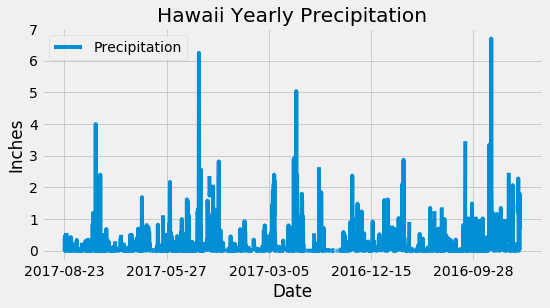

In [63]:
# Use Pandas Plotting with Matplotlib to plot the date
ax = climate_df.plot(figsize=(8,4))
ax.set_xlabel("Date")
ax.set_ylabel("Inches")
ax.set_title("Hawaii Yearly Precipitation")
plt.show()

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis


In [40]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(station.station).order_by(station.station).count()
stations_count

print(f"There are {9} stations available in this dataset.")

There are 9 stations available in this dataset.


In [45]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_station

print(f"Most Active Stations are as follows:")
active_station

Most Active Stations are as follows:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
Top_active_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()
Top_active_station
print(f"The top active station is {Top_active_station}")

The top active station is ('USC00519281', 2772)


In [59]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_temps = session.query(func.min(measurement.tobs),
                                  func.max(measurement.tobs),
                                  func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
most_active_temps
print(f"Most Active Station: {'USC00519281'}")
print(f"Minimum Temp: {54.0}"),
print(f"Maximum Temp: {85.0}"),
print(f"Average Temp: {71.7}")
most_active_temps

Most Active Station: USC00519281
Minimum Temp: 54.0
Maximum Temp: 85.0
Average Temp: 71.7


[(54.0, 85.0, 71.66378066378067)]

In [61]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temp = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= last_year_exact, measurement.station == 'USC00519281').order_by(measurement.date.desc()).all()
last_year_temp

[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

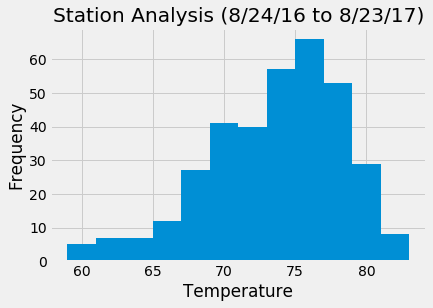

In [69]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df=pd.DataFrame(last_year_temp)
plt.hist(temp_df['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis (8/24/16 to 8/23/17)")
plt.show()

# Routes

In [1]:
from flask import Flask, jsonify

In [2]:
#################################################
# Flask Setup
#################################################
app = Flask(__name__)

@app.route("/")
def Home():
    return (
        f"Welcome to the Hawaii Climate Analysis API!<br/>" 
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation"
        f"/api/v1.0/stations"
        f"/api/v1.0/tobs"
        f"/api/v1.0/<start>"
        f"/api/v1.0/<start>/<end>"
    )
    
#################################################
# Flask Routes
#################################################

@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return the JSON representation of your dictionary"""
    #last 12 months
    prec_route= session.query(measurement.date, func.avg(measurement.prcp)).
    filter(measurement.date >= last_year_exact).
    group_by(measurement.date).all()
    return jsonify(prec_route)


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
